# Déterminer le salaire annuel d’un ingénieur cogniticien
Projet personnel de statistiques M1 IA School 2024 de Victorien Marchand fait par Wilfried RICHARD  
Le rapport est à envoyer en format PDF et est attendu pour le 8 avril 2024 au plus tard.

## Introduction

Un groupe d’étudiants de l’école d’ingénieurs ENISC (École Nationale d’Ingénieurs en Cognitique, à Bordeaux) a mené une enquête par questionnaire à destination d’ancien étudiants pour connaitre ***quels facteurs peuvent influencer le salaire qu’ils gagnent***.
La spécialité d’ingénieur cogniticien est très particulière, seule l’ENISC y forme ***depuis seulement 2003*** et les anciens ingénieurs sont ***peu nombreux*** : il n’existe pas d’autres informations sur cette population. L’échantillon des répondants est considéré comme représentatif de la population des ingénieurs cogniticiens.

### Somaire

<!-- @import "[TOC]" {cmd="toc" depthFrom=1 depthTo=6 orderedList=false} -->
- [Déterminer le salaire annuel d’un ingénieur cogniticien](#d%C3%A9terminer-le-salaire-annuel-dun-ing%C3%A9nieur-cogniticien)
  - [Introduction](#introduction)
    - [Somaire](#somaire)
    - [Objectif](#objectif)
  - [Données](#données)
    - [Import](#import)
    - [Disperssion](#Disperssion)
    - [Dépendence](#dépendence)
  - [Régression](#régression)
    - [Représentation](#représentation)
    - [Distribution](#distribution)
    - [Comparaison](#comparaison)
  - [Conclusion](#conclusion)

### Objectif

Ce rapport ne se résumera pas à une suite de copier-coller de sorties R et devra comprendre une réflexion personnelle sur le problème posé et une conclusion rédigée.
Un rapport expliquant clairement les étapes de votre ***raisonnement***, les ***initiatives*** prises, Les ***statistiques*** descriptives et inférentielles employées pour répondre à la question posée.
***Le but est de savoir si la réussite académique, des facteurs liés à l’entreprise ou personnels jouent sur le salaire***.

## Données

Les variables de la base de données et leur codage sont les suivantes :

1. **promo** : année d’obtention du diplôme d’ingénieur
2. **mention_ecole** : mention obtenue au diplôme d’ingénieur
3. **mention_bac** : mention obtenue au baccalauréat
4. **etudes** : études suivies avant l’entrée dans l’école d’ingénieurs
5. **annees_experience** : nombre d’années d’expérience dans le métier
6. **changements_employeur** : nombre de changements d’employeur au cours de la - carrière
7. **contrat** : type de contrat (CDD ou CDI)
8. **taille_entreprise** : nombre de salariés dans l’entreprise
9. **salaire** : salaire brut annuel (en €)
10. **lieu_travail** : lieu de travail
11. **epanouissement** : à quel point l’ingénieur se sent épanoui dans son travail (Pas du tout / Peu / Oui / Totalement)
12. **sexe** : Homme / Femme
13. **enfants** : avez-vous des enfants
14. **age** : en années
15. **taille** : en cm
16. **poids** : en kg

### Import

In [159]:
path <- "https://github.com/WyloW2RicardO/Travaux/blob/main/Cours/Mathematiques/bdd_regretion_salaire.csv"
path <- "./bdd_regretion_salaire.csv"

In [160]:
#dataset <- read_xlsx(path)
dataset <- read.csv(
    file = path
    #,header = TRUE
    ,dec="," # caracter de separation de decimal
)
#attach(dataset) # Le nom des colonnes deviens des liste corespondant
head(dataset) # montre le debut du tableau

promo,mention_ecole,mention_bac,etudes,annees_experience,changements_employeur,contrat,taille_entreprise,salaire,lieu_travail,epanouissement,sexe,enfants,age,taille,poids
2020,Bien,Sans mention,DUT,1.0,0,CDI,Entre 10 et 249 employés,36000,"Marseille-Aix, Lyon, Lille, Toulouse, Nice ou Bordeaux",Oui,Homme,Non,26,1.70e+02,57
2020,Bien,Bien,Licence,1.0,0,CDI,Entre 10 et 249 employés,40000,Paris ou son agglomération,Oui,Homme,Non,25,1.66e+02,69
2017,Bien,Bien,Classe préparatoire scientifique,3.0,1,CDI,Entre 10 et 249 employés,36000,"Marseille-Aix, Lyon, Lille, Toulouse, Nice ou Bordeaux",Totalement,Homme,Non,25,1.00e+19,10000000
2018,Je ne m'en souviens pas,Bien,Classe préparatoire scientifique,2.5,0,CDI,Entre 10 et 249 employés,42000,Autre ville française,Oui,Homme,Non,25,1.68e+02,68
2018,Bien,Très bien,Classe préparatoire littéraire,3.0,1,CDI,Entre 250 et 4999 employés,84000,Hors UE,Oui,Femme,Non,24,1.69e+02,57
2014,Sans mention,Sans mention,Classe préparatoire scientifique,5.0,1 fois,CDI,Plus de 5000 salariés,35000,"Marseille-Aix, Lyon, Lille, Toulouse, Nice ou Bordeaux",Oui,Homme,Non,32,1.63e+02,67


In [227]:
# cration d'une fonction pour ne pas à avoir à le refaire si néssaisaire
distinct <- function(liste){
  return(as.character(sort(unique(liste))))
}
graphique <- function(
  x
  , y
){
  data <- data.frame(x, y)
  plot(
    data
    #, main = type
    , xlab = names(x)
    , ylab = names(y)
  )
}
rechercher <- function( # recherche la position des valeur correspondent
  liste               # liste des valeur dans laquelle on doit cherhcer
  , valeurRecherche   # la valeur rechercher dans la liste
) {
  listeIndex <- c()
  for (index in 1:length(liste)) { # de 1 à 65
    if (
      !is.na(liste[index]) 
      & liste[index] == valeurRecherche
    ) {
      listeIndex  <- append(
        x = listeIndex
        , values = index
      )
    }
  }
  return(listeIndex) # renvoi une liste des numéro de ligne
}
position <- function ( # Renvoi les position des valeur corespondante
  liste
  , listeRef
) {
  listePos <- c()
  longeurRef <- length(listeRef)
  #print(liste)
  #print(listeRef)
  for (indexListe in seq(length(liste))) {
    indexRef <- 1
    #print(is.character(liste[indexListe]))
            if (grepl("^[0-9]{1,}$", liste[indexListe])) { # pour enchainé texte et numéro
                listePos <- append(listePos, as.numeric(liste[indexListe]))
                } else {
                    #message(paste('debut : ',print(liste[indexListe] != listeRef[indexRef])))
                    while ( # parcour la liste de reference
                        liste[indexListe] != listeRef[indexRef]
                        & indexRef < longeurRef
                        ) {
                            indexRef <- indexRef + 1
                            #message(paste('court : ',liste[indexListe],' != ',listeRef[indexRef],print(liste[indexListe] != listeRef[indexRef])))
                            }
                    if ( # si il y a une erreur d'ecriture
                        indexRef == longeurRef
                        & liste[indexListe] != listeRef[indexRef]
                        ) {
                            message(paste('Les nom sont mal ecrite ; fonction position ', print(liste), print(listeRef)))
                            } else {listePos <- append(listePos, indexRef)}
                    }
            }
        return(listePos)
        }
replacElement <- function( # ramplce tout les valeur avec le meme element 
        listeData    # Liste des données
        , listeModif # Liste à modifier
        , element    # Valeur ou liste
        , ramplace
    ){
        if (missing(listeModif)) {listeModif <- listeData} # si la liste que l'on veut modifier n'est pas la meme
        if (length(element) != length(ramplace)) { # Marche meme si l'element n'est pas une liste
                message(paste('Les listes ne sont pas de la meme longeur'))
            } else {
                listeModif1 <- as.character(listeModif)
                for (index in 1:length(element)) {
                    valeurElement <- if (is.vector(element)){element[index]} else {element}
                    valeuRamplce <- if (is.vector(ramplace)) {ramplace[index]} else {ramplace}
                    #print(valeurElement)
                    #print(listeData)
                    listeIndex <- rechercher(
                        liste = listeData
                        , valeurRecherche = valeurElement
                        )
                    if (length(listeIndex) != 0) {
                        listeModif1 <- replace(
                            x = listeModif1
                            , list = listeIndex
                            , values = valeuRamplce
                            )
                        }
                    }
                }
        return(listeModif1)
    }

overall_p <- function( # Retourne la p-value de summary()
        model
    ) {
        f <- summary(model)$fstatistic
        p <- pf(f[1],f[2],f[3],lower.tail=F)
        attributes(p) <- NULL
        return(p)
    } # https://www.statology.org/r-extract-p-value-from-lm/
equation <- function (resum) { # ecri l'equoition de regression
    #print(resum)
    nomResum <- names(resum)
    #print(nomResum)
    polynome <- paste("Y=",as.integer(resum[[1]]))
    #print(polynome)
    for (index in seq(2,length(nomResum))) {
        polynome <- paste(polynome,"+X_{",nomResum[index],"}*",as.integer(resum[index]))
        }
    return(polynome)
    }
regression <- function(
    affiche = FALSE
    , element # Liste de colonne
    , dataVariable # dataframe des variable explicative
    , data
    , Y = 'salaire'
    ){
        #print(element)
        #print(missing(dataVariable) & !missing(element))
        if (missing(dataVariable) & !missing(element)) {
            dataVariable <- data.frame(data[,element[1]])
            if (length(element) > 1) {
                for (index in element[-1]) { # Implementer les liste
                    dataVariable <- cbind(
                        dataVariable
                        , data[index]
                        )
                    }
                }
            } else {message("il manque les varible dataVariable ou element")}
        #print(tail(dataVariable))
        model <- lm(data[,Y] ~ ., data = dataVariable )
        #message(affiche)
        if (affiche) {
            print(summary(model))
            #plot(model)
            #print(coef(model))
            }
        return(c(
                BIC(model)
                , overall_p(model)
                #, coef(model)
                , equation(coefficients(model))
                , coefficients(model, complete = TRUE)
                )
            )
        }
afficheModel <- function( # affiche laregretion linéair simple
    data
    , colonne
    , Y = 'salaire'
    ) {
        model <- lm(data[,Y] ~ data[,colonne])
        print(summary(model))
        message(paste('BIC : ', BIC(model)))
        message(paste('p-value : ', overall_p(model)))
        liste <- if (
            is.character(data[,colonne])
        ) {
            as.factor(data[,colonne])
        } else {
            as.numeric(data[,colonne])
        }
        plot(model) # 4 graphique
            #x = liste, y = data$salaire, xlab = names(data)[colonne])
        #abline(model)
    }

orderNumeric <- function( # order() ne marche pas dans un cas particulier 
        listeData
    ) {
        dataOrdre <- data.frame( # initialisation
            index = c(1)
            , valeur = c(as.numeric(listeData[1]))
            , ordre = c(1)
            )
    for (indexData in 2:length(listeData)) { # Parcour se qui reste à trier
            indexOrdre <- 1
            nombreLigneOrdre <- nrow(dataOrdre)
            valeurData <- as.numeric(listeData[indexData])
            valeurOrdre <- as.numeric(dataOrdre$valeur[dataOrdre$ordre == indexOrdre])
            #message('debut ', indexData, ' ; ', valeurData, ' > ', valeurOrdre, ' : ', valeurData > valeurOrdre)
            while (valeurData > valeurOrdre) { # trouver sont niveaux
                    indexOrdre <- indexOrdre + 1
                    if (indexOrdre > nombreLigneOrdre) {
                        #message('indexOrdre > nrow(dataOrdre)')
                        break
                        }
                    valeurData <- as.numeric(listeData[indexData])
                    valeurOrdre <- as.numeric(dataOrdre$valeur[dataOrdre$ordre == indexOrdre])
                    #message('cour ', indexOrdre, ' ; ', valeurData, ' > ', valeurOrdre, ' : ', valeurData > valeurOrdre)
                }
            if (indexOrdre <= nombreLigneOrdre) { # reasigner le reste des valeur
                    dataOrdre1 <- dataOrdre[order(dataOrdre$ordre),]
                    for (indexReste in indexOrdre:nombreLigneOrdre) {
                        dataOrdre1$ordre[indexReste] <- dataOrdre1$ordre[indexReste] + 1
                        }
                    dataOrdre <- dataOrdre1[order(dataOrdre1$index),]
                }
            dataOrdre[nombreLigneOrdre + 1,] <- c( # rajout de la nouvel ligne
                indexData
                , as.numeric(listeData[indexData])
                , indexOrdre
                )
        }
    return(dataOrdre$ordre)
    }

afficheRegression <- function( # affiche une table de BIC et p-value
    data
    , colonnes # Liste des colonnes de base
    , eliminer # colonnes que l'on ne veut pas voir
    ) {
        listeBIC <- c()
        listePvalue <- c()
        nomColonnes <- names(data)
        if (missing(colonnes)
            | length(colonnes) == 0
            ) {colonnes <- c()} else {colonnes <- position(
                liste = colonnes
                , listeRef = nomColonnes
                )}
        #print(colonnes)
        if (missing(eliminer)) {eliminer <- c()} else {eliminer <- position(
                liste = eliminer
                , listeRef = nomColonnes
                )}
        eliminer1 <- c(9, colonnes, eliminer)
        #print(eliminer1)
        longeurColonnes <- length(colonnes)
        if (longeurColonnes != 0) { # Initialisation dataframe des variavle
            #print(data[colonnes])
            #dataExplique <- data.frame(data[colonnes[1]])
            dataExplique <- data.frame(data[colonnes[1]])
            if (longeurColonnes > 1) { # Création dataframe des variavle
                for (index in colonnes[-1]) {
                    dataExplique <- cbind(
                        dataExplique
                        , data[index]
                        )
                    }
                }
            }
        sequance <- seq(length(data))[-eliminer1] # ne marche pas si eliminer1 contien du texte
        #print(sequance)
        for (index in sequance) { # Implementer les liste
            couple <- regression(
                data = data
                #, dataVariable = dataExplique1
                , element = append(colonnes, index)
                )
            listeBIC <- append(
                x = listeBIC
                , values = as.numeric(couple[1])
                )
            listePvalue <- append(
                x = listePvalue
                , values = as.numeric(couple[2])
                )
            }
        #print(listeBIC)
        #print(listePvalue)
        listeOrderBIC <- as.numeric(orderNumeric(listeBIC))
        listeOrderPvalue <- as.numeric(orderNumeric(listePvalue))
        listeProd = listeBIC * listePvalue
        df <- data.frame( # Construction tableau final
            index = sequance
            , nam = nomColonnes[-eliminer1]
            , BIC = listeBIC
            , Pvalue = listePvalue
            , prod = listeProd
            , ordreBIC = listeOrderBIC
            , ordrePvalue = listeOrderPvalue
            , ordreProd = as.numeric(orderNumeric(listeProd))
            , prodOrdre = listeOrderBIC * listeOrderPvalue
            )
        return(df)
        #print(df[order(df$prodOrdre),])
        }

In [204]:
# Type de donnée
seqColonne <- seq(length(dataset))
indexNum <- c(1, 5, 6, 9, 14, 15, 16)
indexChar <- seqColonne[-indexNum]
for (index in seqColonne) {
   if (is.element(index, indexNum)) {
      dataset[,index] <- as.numeric(dataset[,index])
      } else {
         dataset[,index] <- as.character(dataset[,index])
         }
   }
dataset1 <- as.data.frame(dataset)

Nous avons rebaptisé les catégories afin de faciliter la compréhension lors de la présentation des résultats.

In [205]:
colonne <- 2
colnames(dataset1)[colonne] <-'ecole'
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = c("Sans mention", "Je ne m'en souviens pas", "Bien", "Très bien", "Assez bien")
    , ramplace = c("Sans", NA, "B", "TB", "AB")
    )
colonne <- 3
colnames(dataset1)[colonne] <-'bac'
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = c("Sans mention", "Bien", "Très bien", "Assez bien")
    , ramplace = c("Sans", "B", "TB", "AB")
    )
colonne <- 4
Sort <- distinct(dataset1[,colonne])
Sort
dataset1[colonne]  <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c('BTS','CPL','CPS','CPS','DUT','Licence')
    )
colnames(dataset1)[5] <-'exp'
colnames(dataset1)[6] <-'chang'
colonne <- 7
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = "Sans emploi"
    , ramplace = "Sans"
    )
colonne <- 8
colnames(dataset1)[colonne] <-'employers'
Sort <- distinct(dataset1[,colonne])
Sort
length(Sort)
dataset1[colonne]  <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c(NA,'[10;249]','[250;4999]','[0;10]','[5000;+]')
    )
colonne <- 10
colnames(dataset1)[colonne] <-'lieu'
Sort <- distinct(dataset1[,colonne])
Sort
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c(NA, 'UE', 'Autre_ville', 'Hors_UE', 'Grande_ville', 'Capital')
    )
colonne <- 11
colnames(dataset1)[colonne] <-'heureu'
Sort <- distinct(dataset1[,colonne])
Sort
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c(NA, 'OUI', 'NON', 'OUI')
    )
colonne <- 12
Sort <- distinct(dataset1[,colonne])
Sort
dataset1[colonne] <- replacElement(
    listeData = dataset1[,colonne]
    , element = Sort
    , ramplace = c(NA, 'H', 'F')
    )
head(dataset1)

[1] "BTS"                                                                                           
[2] "Classe préparatoire littéraire"                                                                
[3] "Classe préparatoire scientifique"                                                              
[4] "Classe préparatoire scientifique, La prépa \"intégrée\" était Classe préparatoire scientifique"
[5] "DUT"                                                                                           
[6] "Licence"

[1] ""                           "Entre 10 et 249 employés"  
[3] "Entre 250 et 4999 employés" "Moins de 10 employés"      
[5] "Plus de 5000 salariés"

[1] 5

[1] ""                                                      
[2] "A l'étranger (UE)"                                     
[3] "Autre ville française"                                 
[4] "Hors UE"                                               
[5] "Marseille-Aix, Lyon, Lille, Toulouse, Nice ou Bordeaux"
[6] "Paris ou son agglomération"

[1] ""           "Oui"        "Peu"        "Totalement"

[1] ""      "Femme" "Homme"

promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
2020,B,Sans,DUT,1.0,1,CDI,[10;249],36000,Grande_ville,OUI,F,Non,26,1.70e+02,5.7e+01
2020,B,B,Licence,1.0,1,CDI,[10;249],40000,Capital,OUI,F,Non,25,1.66e+02,6.9e+01
2017,B,B,CPS,3.0,2,CDI,[10;249],36000,Grande_ville,OUI,F,Non,25,1.00e+19,1.0e+07
2018,NA,B,CPS,2.5,1,CDI,[10;249],42000,Autre_ville,OUI,F,Non,25,1.68e+02,6.8e+01
2018,B,TB,CPL,3.0,2,CDI,[250;4999],84000,Hors_UE,OUI,H,Non,24,1.69e+02,5.7e+01
2014,Sans,Sans,CPS,5.0,3,CDI,[5000;+],35000,Grande_ville,OUI,F,Non,32,1.63e+02,6.7e+01


En remplaçant les catégories on remarque : 
- **études supérieures** ; la catégorie nommé ***'Classe préparatoire scientifique, La prépa "intégrée" était Classe préparatoire scientifique'*** sera considéré comme la catégorie ***'Classe préparatoire scientifique'*** car elles sont équivalentes.
- **Épanouissement** : il y a trop de subjectivité pour être différent d'une relation ***binaire***.

## Recherche

### Préliminaire

On va commencer par ***vérifier*** chaque colonne, si celles-ci correspondent bien aux catégories souhaitées.  
Comme on peut le voir dans la colonne "*chang*" du tableau ci-dessus, à la dernière ligne, la variable est un texte et non numérique.  
Cette dernière a été mise automatiquement  à *"1"* grâce à la mise en forme.

#### Contrat

La question qui a été posée est de déterminer le salaire et non le taux d'***employabilité***. 
De plus, sur les mêmes lignes de données, il ***manque*** la moitié des informations.  
En l'absence d'emploi, les personnes qui ont rempli le sondage n'ont pas pu transcrire les informations concernant l'entreprise, puisqu'elles n'ont pas de travail.  
Elles seront donc **supprimées**. 

In [206]:
#dataset2 <- subset(dataset1, dataset1$contrat != contratSort[1])
indexContratSans <- rechercher(
    dataset1$contrat
    , 'Sans'
    )
dataset1[indexContratSans,]

,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
13,2020,B,B,Licence,1.000,1,Sans,NA,NA,NA,NA,NA,,NA,NA,NA
17,2020,NA,TB,CPL,0.001,1,Sans,NA,NA,NA,NA,NA,,NA,NA,NA
41,2017,B,TB,CPS,3.000,4,Sans,NA,NA,NA,NA,NA,,NA,NA,NA
52,2013,NA,B,CPS,7.000,2,Sans,NA,NA,NA,NA,NA,,NA,NA,NA
55,2019,B,TB,CPL,1.000,1,Sans,NA,NA,NA,NA,NA,,NA,NA,NA


In [207]:
indexContratSans <- rechercher(
    dataset1$contrat
    , 'Sans'
    )
dataset2 <- dataset1[-indexContratSans,]

#### Lieu

On a des salaires très élevés chez des ingénieurs en petit nombre (4) **travaillant à l’étranger**.
Sachant que chaque pays a ses règles salariales (salaire minimum, cotisations sociales, règles du marché différentes) et qu’on ne peut pas comparer les salaires d’un pays à l’autre, je prends le parti
de supprimer ces données.
Cela permettra aussi de ***réduire la variabilité*** de nos données.

In [208]:
indexLieuUE <- rechercher(
    dataset2$lieu
    , 'UE'
    )
index1LieuHEU <- rechercher(
    dataset2$lieu
    , 'Hors_UE'
    )
indexLieuHFrance <- c(indexLieuUE,index1LieuHEU)
dataset2[indexLieuHFrance,]

,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
50,2019,NA,TB,DUT,2.0,2,CDI,[250;4999],42089,UE,OUI,H,Non,24,NA,NA
58,2013,B,B,Licence,7.5,1,CDI,[5000;+],73000,UE,OUI,H,Non,31,160,54
5,2018,B,TB,CPL,3.0,2,CDI,[250;4999],84000,Hors_UE,OUI,H,Non,24,169,57
28,2017,B,AB,CPS,4.0,1,CDI,[250;4999],110000,Hors_UE,OUI,F,Non,28,167,72


In [209]:
dataset2 <- dataset2[-indexLieuHFrance,]

#### Salaire

In [210]:
salaireSort <- distinct(dataset2$salaire)
salaireSort

[1] "40"    "2800"  "2880"  "23000" "23500" "24000" "25000" "25412" "29232"
[10] "30000" "30192" "32000" "32400" "32500" "33000" "33500" "33600" "34500"
[19] "35000" "36000" "38000" "38600" "39000" "40000" "40500" "41000" "42000"
[28] "43000" "45000" "46000" "47000" "50000" "52000" "52700" "54000" "60000"
[37] "75000"

On peut considérer que tous les salaires inférieurs au SMIC sont des erreurs d'enregistrement.  
Les sommes à quatre chiffres peuvent correspondre à un salaire mensuel au lieu d'un salaire annuel brut.  
Les sommes  à deux chiffres peuvent correspondre à des enregistrements en milliers d'euros.

In [211]:
dataset2$salaire <- as.numeric(replacElement(
    listeData = dataset2$salaire
    , element = c(40, 2800, 2880)
    , ramplace = c(40000, 2800*12, 2880*12)
    ))

#### Taille

In [212]:
tailleSort <- distinct(dataset2$taille)
tailleSort

[1] "152"   "153"   "155"   "158"   "160"   "161"   "162"   "163"   "164"  
[10] "165"   "166"   "168"   "169"   "170"   "171"   "172"   "173"   "174"  
[19] "175"   "176"   "177"   "178"   "181"   "182"   "183"   "184"   "185"  
[28] "186"   "187"   "193"   "194"   "195"   "1e+19"

Les valeurs de la taille et du poids sont ***disproportionnées***, par exemple respectivement $10^{19}$ et $10^7$.  
Nous décidons de les remplacer par la ***moyenne nationale**, soit respectivement $175$ et $80$.

In [213]:
dataset2[
    dataset2$taille == 1e+19
    & !is.na(dataset2$taille)
    ,
]
dataset2[3,15] <- 164 # c'est une femme
dataset2[3,16] <- 65

,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
3,2017,B,B,CPS,3,2,CDI,[10;249],36000,Grande_ville,OUI,F,Non,25,1e+19,1e+07


### Disperssion

On s’intéressera donc au salaire de ces ingénieurs uniquement en ***France***.  
Il reste $n=53$ ingénieurs dans la base de données.
Sachant que le salaire est notre variable à expliquer, on peut se pencher sur sa boîte à **moustaches** et sa **distribution**.

ERROR: Error in x[floor(d)] + x[ceiling(d)]: argument non numérique pour un opérateur binaire


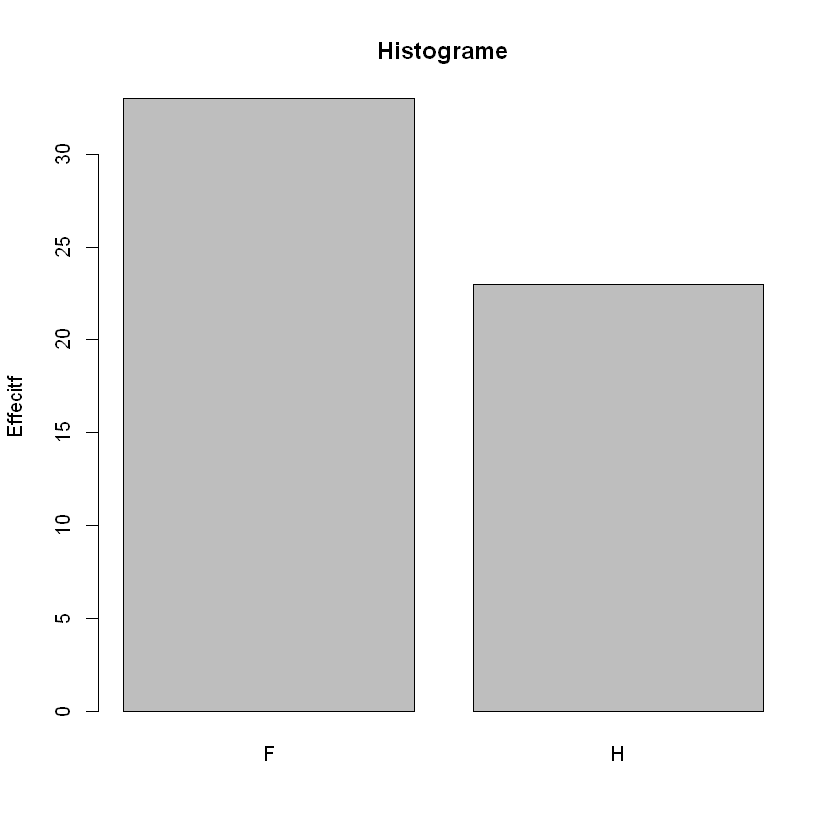

In [214]:
colonne <- "sexe"
#tableColonne <- table(dataset2[,colonne])
#tableColonne
tableColonne <- as.factor(dataset2[,colonne])
#summary(tableColonne)
plot(tableColonne,
    , main = "Histograme"
    , xlab = names(dataset2)[colonne]
    , ylab = "Effecitf"
    )
boxplot(dataset2[,colonne], xlab = names(dataset2)[colonne], horizontal = TRUE)
#hist(dataset2[,colonne],main = )

On observe une forte propotion de personne avec peut experience de travaille par raport à l'effectife de promotion eyant repondu au sondage.  
Il sont en general ``satisfait`` de leur travaille se qui pourais explique le peut de ``changement`` d'entreprise.  

On remarque aussi des points extremes en `salaire`

In [215]:
colonne <- 9
Q1 <- quantile(
    x = dataset2[colonne]
    , prob = .25 
    , na.rm = TRUE
    )
Q3 <- quantile(
    x = dataset2[colonne]
    , prob = .75
    , na.rm = TRUE
    )
QI <- as.numeric(Q3 - Q1)
QIR <- as.numeric(c(
    Q1 - 1.5 * QI
    , Q3 + 1.5 * QI
    ))
dataset2[dataset2[colonne] < QIR[1] & !is.na(dataset2[colonne]),]
dataset2[dataset2[colonne] > QIR[2] & !is.na(dataset2[colonne]),]

promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids


,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,heureu,sexe,enfants,age,taille,poids
29,2014,AB,Sans,DUT,6,4,CDI,[10;249],60000,Capital,OUI,F,Oui,30,182,68
38,2010,AB,AB,CPS,10,6,CDI,[5000;+],75000,Grande_ville,OUI,F,Oui,33,NA,NA


Il est ***difficile*** de déterminer si les valeurs du **salaire** sont aberrantes ou non, à partir des résultats obtenus.  
Pour la catégorie du **nombre de changements d'entreprise**, elles semblent plutôt ***cohérentes*** dans la globalité.  
Aucune modification ne sera opérée, on les gardera à l'esprit.

### Dépendence

In [216]:
t.test(x=dataset2["taille"],y=dataset2["poids"],conf.level = 0.99)
#graphique(x = dataset2["taille"],y = dataset2["poids"])

t.test(x=dataset2["promo"],y=dataset2["exp"],conf.level = 0.99)
#graphique(x = dataset2[14],y = dataset2[6])

t.test(x=dataset2["exp"],y=dataset2["chang"],conf.level = 0.99)
#graphique(x = dataset2[5],y = dataset2[6])

t.test(x=dataset2["age"],y=dataset2["chang"],conf.level = 0.99)
#graphique(x = dataset2[14],y = dataset2[6])

#table(dataset2[,"employers"],dataset2[,"lieu"])
t.test(table(dataset2[,"employers"],dataset2[,"lieu"]),conf.level = 0.99)
#graphique(x = dataset2[,10],y = dataset2[,8])


	Welch Two Sample t-test

data:  dataset2["taille"] and dataset2["poids"]
t = 41.38, df = 89.847, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
  96.69663 109.83121
sample estimates:
mean of x mean of y 
 171.8039   68.5400 



	Welch Two Sample t-test

data:  dataset2["promo"] and dataset2["exp"]
t = 3961.6, df = 109.07, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 2010.972 2013.635
sample estimates:
  mean of x   mean of y 
2016.232143    3.928571 



	Welch Two Sample t-test

data:  dataset2["exp"] and dataset2["chang"]
t = 3.7365, df = 93.547, p-value = 0.0003209
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 0.449714 2.586000
sample estimates:
mean of x mean of y 
 3.928571  2.410714 



	Welch Two Sample t-test

data:  dataset2["age"] and dataset2["chang"]
t = 53.944, df = 83.504, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 24.03314 26.50258
sample estimates:
mean of x mean of y 
27.678571  2.410714 



	One Sample t-test

data:  table(dataset2[, "employers"], dataset2[, "lieu"])
t = 5.5697, df = 11, p-value = 0.0001677
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 2.064416 7.268918
sample estimates:
mean of x 
 4.666667 


In [217]:
dataset3 <- cbind(dataset2, dataset2["poids"] / (dataset2["taille"]/100)^2)
colnames(dataset3)[length(dataset3)] <- "IMC"

dataset3 <- cbind(dataset3, dataset3["exp"] / (2021-dataset3["promo"]))
colnames(dataset3)[length(dataset3)] <- "exp/promo"

dataset3 <- cbind(dataset3, dataset3["exp"] / dataset3["chang"])
colnames(dataset3)[length(dataset3)] <- "exp/chang"

In [218]:
summary(dataset3[,"IMC"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  16.97   19.83   23.79   23.01   25.24   29.74       6 

l’IMC maximale est de 28 : on n’a donc dans notre échantillon que des individus à corpulence normale (puisque l’obésité est défini au-delà de 30).

In [219]:
#table(dataset2[,"sexe"],dataset2[,"taille/poids"])
t.test(table(dataset3[,"sexe"],dataset3[,"IMC"]),conf.level = 0.99)
#graphique(x = dataset2[,"sexe"],y = dataset2[,"taille/poids"])


	One Sample t-test

data:  table(dataset3[, "sexe"], dataset3[, "IMC"])
t = 9.8672, df = 93, p-value = 3.907e-16
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 0.3901531 0.6736767
sample estimates:
mean of x 
0.5319149 


Certaines variables ne sont pas indépendantes entre elles, il serait préférable de faire un produit entre deux variables dépendantes entre elles.  
On constate ci-dessus, que se sont des ***variables dépendantes*** entre elles dans notre echantillon.  
Nous ne prendrons pas les nouvelles variables en rapport avec l'**âge** car elles sont ***difficiles*** à expliquer de manière objective.  
La nouvelle variable qui dépend de l'emplacement et de la taille de l'**entreprise** est plus ***complexe*** à définir.

Explication des nouvelles variables :
- **IMC**  : l’Indice de Masse Corporelle.
- **exp/promo** : l'experience realiser sur le nombre d'experience possible
- **exp/chang** : c'est la moyenne d'années accordées à chaque employeur.

## Régression

### Représentation


Call:
lm(formula = data[, Y] ~ data[, colonne])

Residuals:
   Min     1Q Median     3Q    Max 
-16493  -5247  -1375   4065  33507 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          41493.2     2573.3  16.125   <2e-16 ***
data[, colonne]B     -5558.1     3113.9  -1.785   0.0813 .  
data[, colonne]Sans   -493.2     5942.7  -0.083   0.9342    
data[, colonne]TB    -4493.2     5942.7  -0.756   0.4537    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9278 on 43 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.07662,	Adjusted R-squared:  0.0122 
F-statistic: 1.189 on 3 and 43 DF,  p-value: 0.3251



BIC :  1007.17894198343
p-value :  0.325080909952881


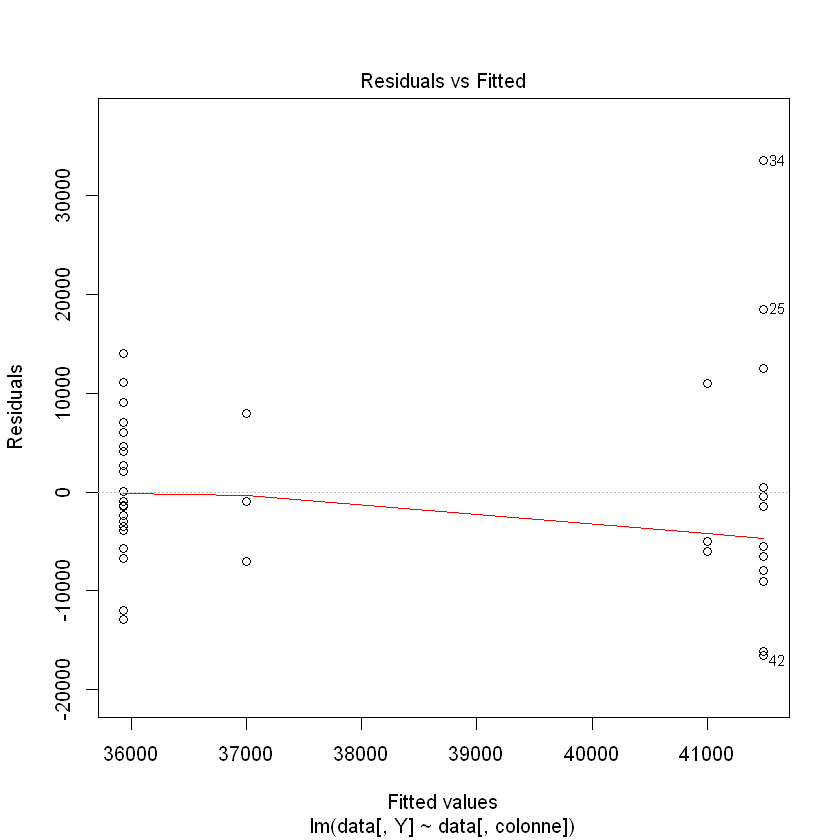

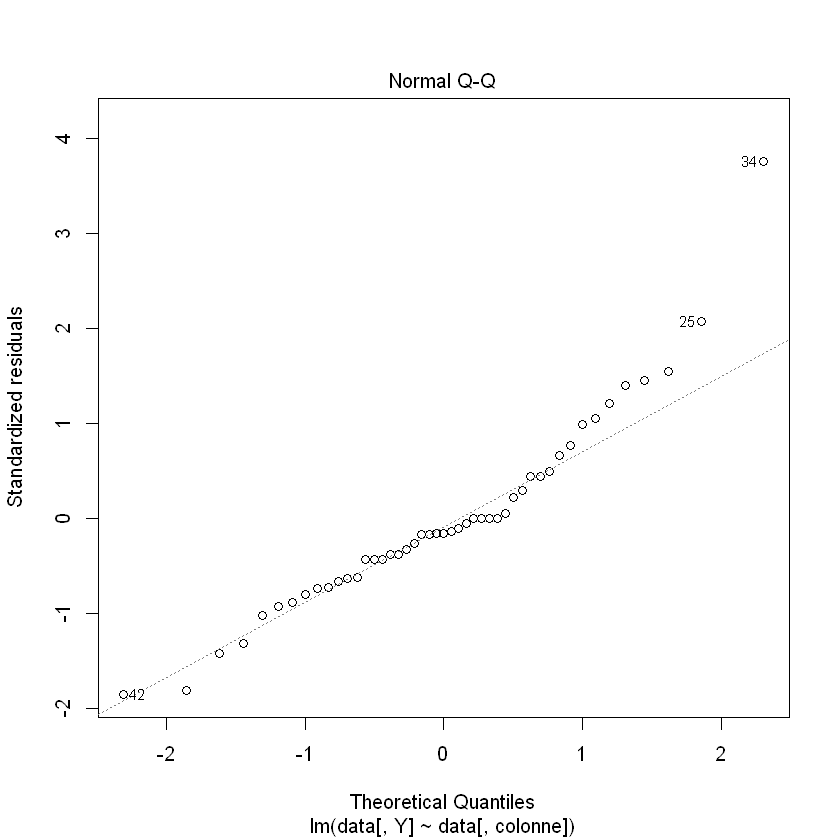

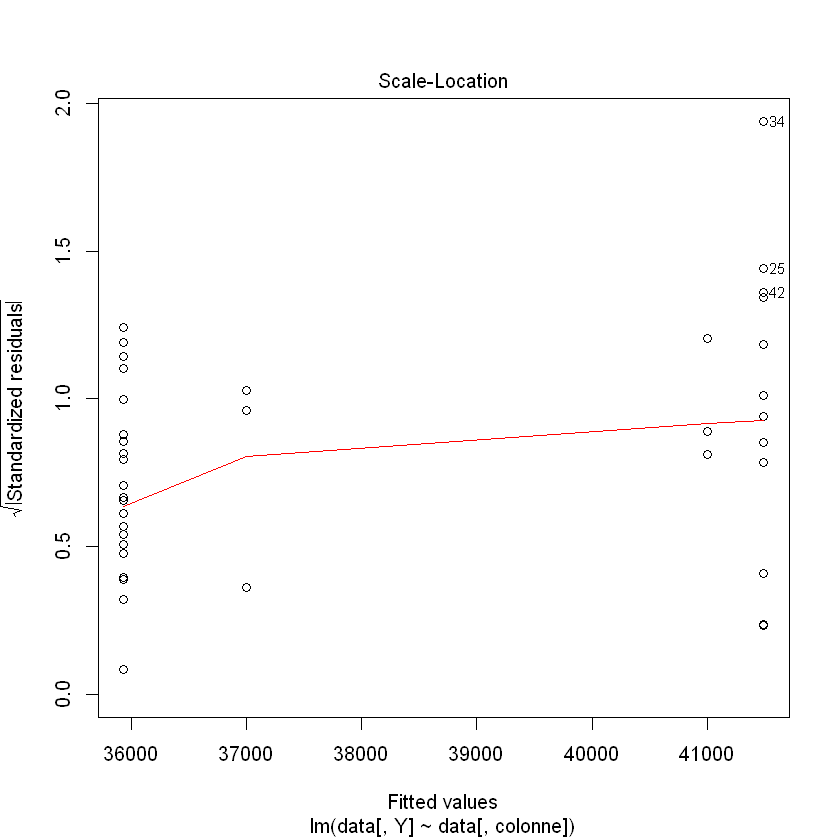

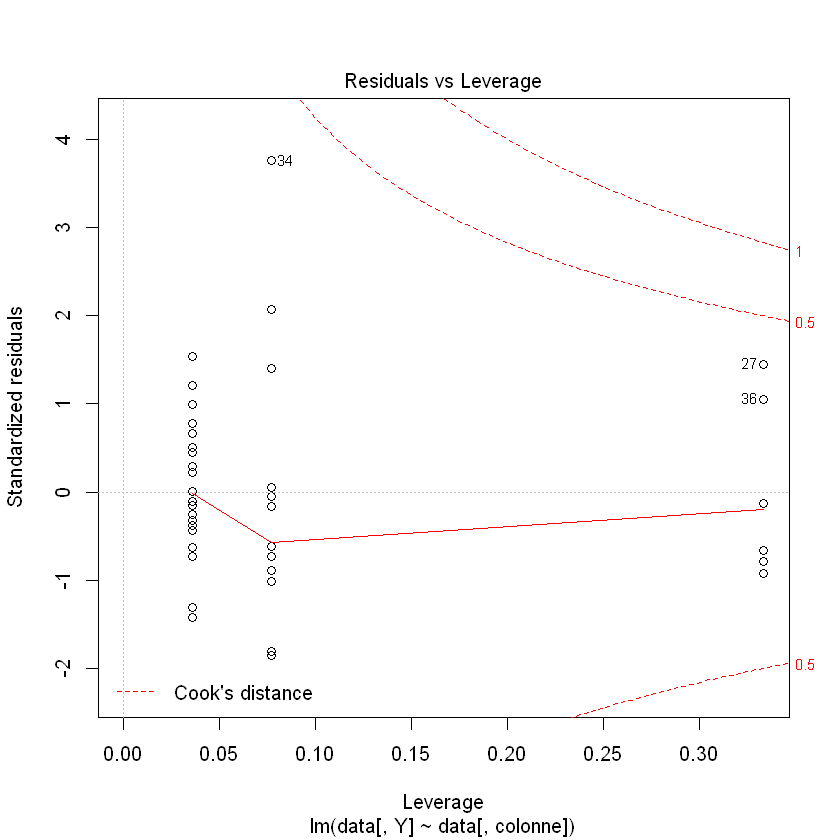

In [220]:
afficheModel(data = dataset3, colonne = "ecole")

Pour la version en ligne, vous pouvez ***défiler*** les différents graphiques en modifiant la variable `colonne` de la fonction ci-dessous.

Au cours du défilement, nous n'avons pas constaté de modification à effectuer sur des variables par une ***fonction***.
Nous avons remaquer que pour ``ecole``,	``bac`` et ``etudes`` ne représante pas le ``salaire``. Elles seront donc retirer cette variable du modèle final.

Nous avons cependant bien sûr constaté que, comparativement à une interprétation humaine, les droites de régression ne sont toujours ***pas suffisamment inclinées***, due aux points extrêmes des salaire laissés.  
Nous envisagerons de les ***conserver*** afin d'obtenir un modèle plus robuste et que dans leur globalité et ses valeurs ne sont pas aussi aberrantes.

### Distribution

Lors de notre première régression, nous avions omis de distribuer les catégories des colonnes.  
Cela signifie que chaque catégorie des colonnes non continues (caractère) sera ***distribuée*** en autant de colonnes binaires.
Nous avons observé que les résultats de régression pour la même cathegorie d'interception étaient différents entre la mise ortogonal automatique et notre distribution.  
Nous sélectionnerons la colonne de référence à la fin.

In [221]:
categorie <- function(
    data
    , colonne
    , exept
    ) {
        vectorNull <- as.numeric(rep(0, nrow(data)))
        if (missing(exept)) {exept <- ""}
        #print(data[colonne])
        listeUnique <- distinct(data[,colonne])
        #print(listeUnique)
        dataNew <- data
        for (index in seq(length(listeUnique))) {
            dataNew <- cbind(
                dataNew
                , if (listeUnique[index] == exept) {vectorNull} else {
                    as.numeric(replacElement(
                        listeData = data[,colonne]
                        , listeModif = vectorNull
                        , element = listeUnique[index]
                        , ramplace = 1
                        ))
                    }
                )
            colnames(dataNew)[length(dataNew)] <- paste( # modifier le nom de la colonne
                names(data)[colonne]
                , listeUnique[index]
                , sep = "" # separation
                )
            }
        return(dataNew)
        }
dataset4 <- categorie(data = dataset3, colonne = 2)#, exept = "AB")
#regression(affiche = TRUE, data = dataset2, element = c(2))
#regression(affiche = TRUE, data = dataset3, element = c(17,18,19,20))
for (index in indexChar[-1]) {
    dataset4 <- categorie(data = dataset4, colonne = index)
    }
tail(dataset4)
indexEcole <- c(20,21,22,23)
indexBac <- c(24,25,26,27)
indexEtudes <- c(28,29,30,31,32)
indexContrat <- c(33,34)
indexEmployers <- c(35,36,37,38)
indexLieu <- c(39,40,41,42,43)
indexHeureu <- c(44,45)
indexSexe <- c(46,47)
indexEnfants <- c(48,49)

,promo,ecole,bac,etudes,exp,chang,contrat,employers,salaire,lieu,...,employers[5000;+],lieuAutre_ville,lieuCapital,lieuGrande_ville,heureuNON,heureuOUI,sexeF,sexeH,enfantsNon,enfantsOui
60,2019,B,TB,CPS,2.0,2,CDI,[10;249],32000,Autre_ville,...,0,1,0,0,0,1,0,1,1,0
61,2019,AB,AB,CPS,2.0,1,CDI,[10;249],40000,Capital,...,0,0,1,0,0,1,0,1,1,0
62,2013,B,Sans,Licence,7.0,2,CDI,[5000;+],40000,Capital,...,1,0,1,0,0,1,1,0,1,0
63,2019,B,TB,CPS,1.0,1,CDI,[5000;+],33000,Grande_ville,...,1,0,0,1,0,1,1,0,1,0
64,2010,B,B,CPS,3.5,4,CDD,[10;249],34560,Capital,...,0,0,1,0,0,1,1,0,1,0
65,2016,B,Sans,Licence,3.0,2,CDI,[0;10],32500,Grande_ville,...,0,0,0,1,0,1,0,1,0,1


In [230]:
choix <- c('ecoleAB','ecoleB','ecoleTB') #,'ecoleSans' | coefficient ... | p-value=96% & R²=0% & BIC=1340
choix <- c('bacAB','bacB','bacTB') #,'bacSans' | coefficient ... | p-value=78% & R²=2% & BIC=1339
choix <- c('etudesBTS','etudesDUT','etudesCPL','etudesCPS') #,'etudesLicence' | coefficient ... | p-value=100% & R²=0% & BIC=1344
choix <- c('contratCDI') #'contratCDD', | coefficient positive | p-value=0% & R²=15% & BIC=1322
choix <- c('employers[10;249]','employers[250;4999]','employers[5000;+]') #'employers[0;10]', | coefficient croissant | p-value=44% & R²=5% & BIC=1338
choix <- c('lieuGrande_ville','lieuCapital','lieuUE','lieuHors_UE') #'lieuAutre_ville', | coefficient "croissant" | p-value=0% & R²=60% & BIC=1289
choix <- c('heureuOUI') #'heureuNON', | coefficient positive | p-value=43% & R²=1% & BIC=1332
choix <- c('sexeF') #,'sexeH' | coefficient positive | p-value=44% & R²=1% & BIC=1332
choix <- c('enfantsOui') #'enfantsNon', | coefficient positive | p-value=10% & R²=4% & BIC=1329
choix <- c('age') # coefficient positive | p-value=5% & R²=6% & BIC=1328
choix <- c('IMC') # coefficient negative | p-value=47% & R²=1% & BIC=1177
regression(affiche = TRUE, data = dataset4, element = choix)
choix <- c('promo/exp') # coefficient negative | p-value=0% & R²=14% & BIC=1323
choix <- c('exp/chang') # coefficient negative | p-value=44% & R²=7% & BIC=1328


Call:
lm(formula = data[, Y] ~ ., data = dataVariable)

Residuals:
   Min     1Q Median     3Q    Max 
-15215  -3911  -1129   3533  23372 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         27106.5     7566.4   3.582 0.000793 ***
data...element.1..    463.8      325.4   1.425 0.160568    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7679 on 48 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.0406,	Adjusted R-squared:  0.02061 
F-statistic: 2.031 on 1 and 48 DF,  p-value: 0.1606



"1046.21102329398" 
                                          
                      "0.160568185538459" 
                                          
"Y= 27106 +X_{ data...element.1.. }* 463" 
                              (Intercept) 
                       "27106.4960550968" 
                       data...element.1.. 
                       "463.790363469851"

Quelques remarques sur les coefficients des régressions :

1. **Année de promotion** : diminue avec le temps, alors la valeur de la monnaie augmente de 2 % par an. Rappelons que l'effectif entre 2010 et 2013 est faible.
2. **mention à l'école** : les ***coefficients sont incohérents*** (une personne avec la mention très bien serait moins bien payé qu'une personne sans mention) car ils ne sont pas assez nombreux pour représenter cette catégorie.
2. **Mention au bac** : les ***coefficients sont incohérents***.
3. **Étude supérieure** : les ***coefficients sont incohérents***.
4. **Lieu de travail** : un ingénieur serait mieux payé dans des petites et moyennes villes que dans des grandes villes de France. Rappelons que cette variable est corrélée avec la **taille de l'entreprise**.
5. **Contrat** : on peut être embauché en CDD pour des ***missions spécifiques*** et être embauché plus cher.
6. **IMC** : on peut se demander si ce n'est pas cette proportion qui est prise de façon subjective.
7. **Année de promotion** : lien négatif qui peut s'expliquer par le nombre d'années ***d'expérience***.
8. **promo/exp** : plus on sort taux plus on a le temps d'avoir de l'expérience.

### Comparaison

**Aplication d'un cas particulier** :  
Soit un jeunne ingegnieur cognicient, homme de corpulence moyenne de 25ans qui à optenu sont diplomme en 2020 avec 1an d'experience et sans enfant,
heureux dans une entreprise entre 10 et 249 employers se situant dans une grande ville qui là embaucher en CDI.

In [229]:
choix <- c() #
choix <- c(choix,'contratCDI') #'contratCDD',
choix <- c(choix,'employers[10;249]','employers[250;4999]','employers[5000;+]') #'employers[0;10]',
choix <- c(choix,'lieuGrande_ville','lieuCapital') #'lieuAutre_ville',
choix <- c(choix,'heureuOUI') #'heureuNON',
choix <- c(choix,'sexeF') #,'sexeH'
choix <- c(choix,'enfantsOui') #'enfantsNon',
choix <- c(choix,'age')
choix <- c(choix,'IMC')
choix <- c(choix,'exp/promo')
choix <- c(choix,'exp/chang')
result1 <- regression(affiche = TRUE, data = dataset4, element = choix) # coefficient ... | p-value=0% & Adjusted_R²=86% & BIC=1107
message(paste('BIC : ', result1[1]))
message(paste('Polynome : ', result1[3]))
cas1 <- (as.numeric(result1[4])
    + as.numeric(result1[5])
    + as.numeric(result1[6])
    + as.numeric(result1[9])
    + as.numeric(result1[11])
    + 25*as.numeric(result1[14])
    + 2.6*as.numeric(result1[15])
    + 1*as.numeric(result1[16]))
message(paste('Resultat cas particulier : ', cas1))
message(paste('corpulence moyenne : ',mean(dataset4[,'IMC'],na.rm = TRUE)))


Call:
lm(formula = data[, Y] ~ ., data = dataVariable)

Residuals:
    Min      1Q  Median      3Q     Max 
-8270.5 -3149.5  -172.3  2076.5  8764.5 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4532.2     9972.6  -0.454 0.652224    
data...element.1..      7896.2     2110.2   3.742 0.000636 ***
`employers[10;249]`     4878.1     3020.4   1.615 0.115034    
`employers[250;4999]`   3376.1     3264.5   1.034 0.307944    
`employers[5000;+]`     5102.4     3019.3   1.690 0.099685 .  
lieuGrande_ville       -2275.9     1774.1  -1.283 0.207723    
lieuCapital             4140.1     2053.9   2.016 0.051340 .  
heureuOUI               -954.5     3405.5  -0.280 0.780867    
sexeF                   2382.2     1639.4   1.453 0.154842    
enfantsOui              5958.1     2596.7   2.294 0.027701 *  
age                      843.8      289.8   2.911 0.006142 ** 
IMC                      211.7      251.8   0.841 0.406035    
`exp/promo`     

BIC :  1031.96057307247
Polynome :  Y= -4532 +X_{ data...element.1.. }* 7896 +X_{ `employers[10;249]` }* 4878 +X_{ `employers[250;4999]` }* 3376 +X_{ `employers[5000;+]` }* 5102 +X_{ lieuGrande_ville }* -2275 +X_{ lieuCapital }* 4140 +X_{ heureuOUI }* -954 +X_{ sexeF }* 2382 +X_{ enfantsOui }* 5958 +X_{ age }* 843 +X_{ IMC }* 211 +X_{ `exp/promo` }* 4440 +X_{ `exp/chang` }* -787
Resultat cas particulier :  31097.7169333282
corpulence moyenne :  23.0103615458084


Cette première régression nous laisse supposer un rôle des variables contrat (les CDI sont plus rémunérateurs que les CDD), taille_entreprise (les plus grosses boîtes paient mieux) et capital (travailler à Paris rapporte plus).  
D’autres résultats sont curieux : par exemple ni l’âge ni l’expérience n’expliquent le salaire (ce qui va à l’encontre de ce qu’on image avec des ingénieurs payés à l’ancienneté).  
On n’a pas non plus d’effet du sexe et de l'IMC (il pourrait y avoir eu un effet de censure ou complexées par leur poids).  
Reste à opter pour un plan d’action pour trouver maintenant le meilleur modèle explicatif.

Etant donné le nombre important de variables et le faible nombre d’observations, ici nous partons d’une approche ***ascendante*** : on part d’un modèle sans variables et on les ajoute peu à peu.  
Avec le critère BIC en prenant à chaque fois la p-value la plus faible. C’est ici un choix restrictif (on veut le modèle le plus compact possible), d’autres critères sont également possibles (le plus petit AIC ou BIC, le plus petit R² ajusté…).

Les p-value des coefficients restent pour la plupart très faibles, mais on conjserve un ***BIC proche*** du précédent.

In [228]:
nonSelect <- c('exp','chang','taille','poids','ecole','bac','etudes','promo')
choix <- c() #
choix <- c(choix,'contrat') # p-vale=0% & BIC=1174
choix <- c(choix,'age') # p-vale=0% & BIC=1161
choix <- c(choix,'sexe') # p-vale=0% & BIC=1160.9
choix <- c(choix,'enfants') # p-vale=0% & BIC=1160.2
choix <- c(choix,'lieu') # p-vale=0% & BIC=1159
choix <- c(choix,'IMC') # p-vale=0% & BIC=1015
result <- afficheRegression(data = dataset3, colonnes = choix, eliminer = nonSelect)
result[order(result$Pvalue),]
choix <- c() #
choix <- c(choix,'contratCDI')
choix <- c(choix,'lieuGrande_ville','lieuCapital')
choix <- c(choix,'sexeF')
choix <- c(choix,'enfantsOui')
choix <- c(choix,'age')
choix <- c(choix,'IMC')
result2 <- regression(affiche = TRUE, data = dataset4, element = choix)
message(paste('BIC : ', result2[1]))
message(paste('Polynome : ', result2[3]))
cas2 <- (as.numeric(result2[4])
    + as.numeric(result2[5])
    + as.numeric(result2[6])
    + 25*as.numeric(result2[10])
    + 2.6*as.numeric(result2[11]))
message(paste('Resultat cas particulier : ', cas2))
message(paste('Diference des cas : ', cas2 - cas1))
message(paste('Diference des BIC : ', as.numeric(result2[1]) - as.numeric(result1[1])))

,index,nam,BIC,Pvalue,prod,ordreBIC,ordrePvalue,ordreProd,prodOrdre
4,19,exp/chang,1018.318,3.947957e-08,4.020275e-05,1,1,1,1
3,18,exp/promo,1018.714,4.596810e-08,4.682836e-05,2,2,2,4
2,11,heureu,1019.862,7.137274e-08,7.279035e-05,3,3,3,9
1,8,employers,1024.672,2.646045e-07,2.711328e-04,4,4,4,16



Call:
lm(formula = data[, Y] ~ ., data = dataVariable)

Residuals:
    Min      1Q  Median      3Q     Max 
-9803.7 -2846.8  -291.9  2044.8  9878.3 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           342.6     8782.5   0.039  0.96907    
data...element.1..   7884.1     1799.9   4.380 7.74e-05 ***
lieuGrande_ville    -2589.3     1648.1  -1.571  0.12368    
lieuCapital          5240.9     1887.3   2.777  0.00817 ** 
sexeF                2530.6     1533.5   1.650  0.10635    
enfantsOui           3956.8     2244.9   1.763  0.08526 .  
age                   818.5      255.9   3.198  0.00263 ** 
IMC                   273.3      231.1   1.183  0.24355    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4797 on 42 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.6724,	Adjusted R-squared:  0.6178 
F-statistic: 12.31 on 7 and 42 DF,  p-value: 1.936e-08



BIC :  1015.96362208489
Polynome :  Y= 342 +X_{ data...element.1.. }* 7884 +X_{ lieuGrande_ville }* -2589 +X_{ lieuCapital }* 5240 +X_{ sexeF }* 2530 +X_{ enfantsOui }* 3956 +X_{ age }* 818 +X_{ IMC }* 273
Resultat cas particulier :  26811.1444873279
Diference des cas :  -4286.57244600037
Diference des BIC :  -15.99695098758


On voit ici que l'influence du sexe et du enfants sont à l'opposer des resultats globale du marcher du travaile.

## Conclusion

L'ensemble des données de base ont été ***nettoyées*** (*des erreurs sûrement dues à des problèmes de somnolence ou de bizutage*), pour obtenir un environnement de travail correct.  
À partir de cette nouvelle table, nous avons réalisé des ***visualisations*** de chaque VE (variable explicative), qui permet de faire une première analyse de leur comportement dans lequel nous avons remarqué de possibles corrélations et des points extrêmes.  
Avec cette phase de travail, nous avons procédé à des tests de ***corrélation*** entre les VE pour vérifier la véracité des remarques évoquées précédemment.  
Ensuite, nous avons visualisé les différentes régressions simples pour faire une première sélection des VE et de ***comprendre*** leur comportement.
Pour clore, nous déterminons les VE les plus ***pertinentes*** par une méthode conventionnelle.

Depuis 2003, ENISC forme des ingénieurs en cognatique.
Uniquement 65 personnes diplômées de 2010 à 2020 ont répondu au sondage.  
En dépit de son ***échantillon faible***, elle doit être considérée comme représentative de cette population.  
Comme l'a montré une autre étude, la population répondant le plus au sondage sont des statisticiens, imaginez donc quelle serait la proportion de réponse au sondage si ce n'était pas à ces personnes.

Il faudrait vérifier s'il existe une véritable dépendance entre les variables `lieu` et `employers` dans une autre étude grâce à "opendata.gouv".  
Il serait pertinent de comparer le polynôme trouvé avec un ingénieur, peu importe sa spécialité, afin de déterminer si ces ***critères sont inhérents*** à ce secteur.